In [1]:
import pandas as pd
import sqlite3 as s3

In [2]:
con = s3.connect("factbook.db")

In [4]:
q="select * from facts LIMIT 5"

In [5]:
df = pd.read_sql_query(q,con)

In [6]:
df.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [9]:
q = "select MIN(population), MAX(population), MIN(population_growth) , MAX(population_growth) from facts"
df = pd.read_sql_query(q,con)
df.head()

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [10]:
q = "select name from facts where population = 0"
df = pd.read_sql_query(q,con)
df.head()

,name
0,Antarctica


In [11]:
q = "select name from facts where population = 7256490011"
df = pd.read_sql_query(q,con)
df.head()

,name
0,World


Is there really nobody living in Antartica? According to google there's 1000 people living there; tha's curious. We can see the max population in the table is the world population. Over 7 billion by 2015'

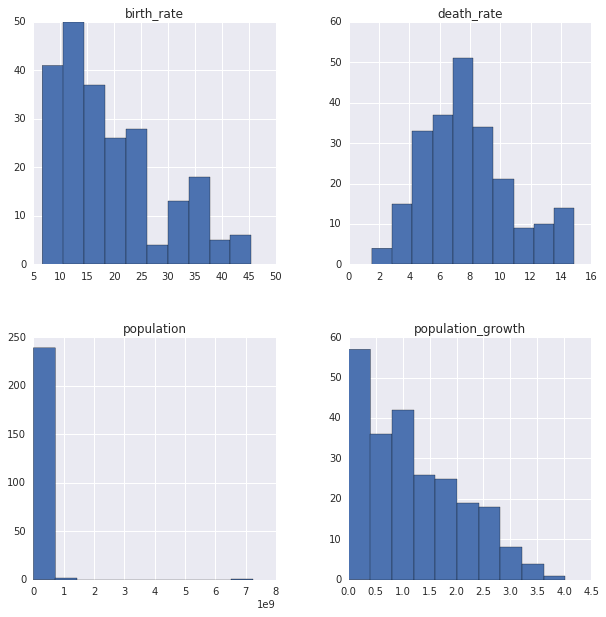

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
q = "select population, population_growth, birth_rate, death_rate from facts where population != 7256490011 OR population !=0"
df = pd.read_sql_query(q,con)
df.hist(figsize=(10,10))
plt.show()

In [17]:
q7 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q7, con)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


In [18]:
q7 = '''select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q7, con)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42
